In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [71]:
tempos = pd.read_csv("tempos.csv").apply(lambda x: x.str.replace(',','.')).astype("float")
tempos

,Bolinha 1,Bolinha 2,Bolinha 3,Bolinha 4
0,1.87,1.50,1.16,0.79
1,1.94,1.44,1.09,0.81
2,1.81,1.47,1.06,0.72
3,1.97,1.44,1.09,0.72
4,1.85,1.43,1.09,0.72
5,1.84,1.44,1.09,0.81
6,1.84,1.47,1.09,0.75
7,1.97,1.44,1.00,0.82
8,1.85,1.47,1.06,0.75
9,1.91,1.47,1.10,0.84


In [72]:
p = 7.82e3
pl = 1.2e3
A = 0.02775
H = 0.398
g = 9.8
r = np.array([1*10**-3, 1.25*10**-3, 1.5*10**-3, 1.95*10**-3])
ds = 0.2
K = lambda r: (1 + 2.4*r/A)/(1 + 3.3*r/H)
vel = lambda ds,t: ds / t
ts = tempos.apply(lambda x: np.mean(x), axis=0).values

In [73]:
x = lambda r,g,p,pl: (2/9)*(p - pl)*g*r**2
y = lambda K,v: K*v

## Cálculo das incertezas

Incerteza de f.d.p associada à medição do tempo de cada bolinha:

In [74]:
tempos.apply(lambda x: np.std(x) / (x.shape[0] ** (1/2)), 
             axis=0)

Bolinha 1    0.019667
Bolinha 2    0.013673
Bolinha 3    0.009830
Bolinha 4    0.010356
dtype: float64

$$ 
u_t = \frac{\sigma}{\sqrt{n}}, n = 20 \\~\\ 
u_L = \frac{0,02m}{2\sqrt{6}} = 0,004m \\~\\  
u_H = \frac{0,02m}{2\sqrt{6}} = 0,004m \\~\\
u_A = \frac{0,00005m}{2\sqrt{6}} = 0,00001m \text{ *medido  com parquímetro} \\~\\
u_r = \frac{0,00005m}{2\sqrt{6}} = 0,00001m \text{ *medido  com parquímetro}
$$

In [75]:
ut = tempos.apply(lambda x: np.std(x) / (x.shape[0] ** (1/2)), 
                  axis=0).values
uL = 0.004
uH = 0.004
uA = 0.00001
ur = 0.00001
ut

array([0.01966723, 0.01367251, 0.00983044, 0.01035555])

|Incerteza | valor          |
|----------|----------------|
| $u_{t1}$ | $\text{0,02}s$ |
| $u_{t2}$ | $\text{0,01}s$ |
| $u_{t3}$ | $\text{0,01}s$ |
| $u_{t4}$ | $\text{0,01}s$ |

$$v'_L = \frac{L}{t}$$

$$u_{v'_L} = \sqrt{(\frac{\delta u_{v'_L}}{\delta L})^2 u_L^2 + \frac{\delta u_{v'_L}}{\delta t})^2 u_t^2}$$

$$u_{v'_L} = \sqrt{(1)^2 u_L^2 + (\frac{-1}{t^2})^2 u_t^2}$$


In [76]:
uv = np.array([(uL**2 + (-1/t**2)**2 * ut[i]**2)**(1/2) 
               for (i,t) in enumerate(ts)])
uv

array([0.0065894 , 0.00785206, 0.00921079, 0.01834639])

|Incerteza      | valor             |
|---------------|-------------------|
| $u_{v'_{L1}}$ | $\text{0,007m/s}$ |
| $u_{v'_{L2}}$ | $\text{0,008m/s}$ |
| $u_{v'_{L3}}$ | $\text{0,009m/s}$ |
| $u_{v'_{L4}}$ | $\text{0,02m/s}$  |


$$K = 1 + 3,3\frac{r}{H} + 2,4\frac{r}{A} + 7,92\frac{r^2}{AH}$$

$$\frac{\delta K}{\delta A} = -2,4rA^{-2} -7,92\frac{r^2}{H}A^{-2}$$

$$\frac{\delta K}{\delta H} = -3,3rH^{-2} -7,92\frac{r^2}{A}H^{-2}$$

$$\frac{\delta K}{\delta r} = \frac{3,3}{H} + \frac{2,4}{A} + 15,84\frac{r}{AH}$$

$$u_K = \sqrt{(\frac{\delta K}{\delta A})^2 u_A^2 + (\frac{\delta K}{\delta H})^2 u_H^2 + (\frac{\delta K}{\delta r})^2 u_r^2}$$

In [77]:
dKA = lambda r,A,H: -2.4*r*A**(-2) - 7.92*r**2/H*A**(-2)
dKH = lambda r,A,H: -3.3*r*H**(-2) - 7.92*r**2/A*H**(-2)
dKr = lambda r,A,H: 3.3/H + 2.4/A + 15.84*r/(A*H)

uK = np.array([((dKA(r,A,H))**2*uA**2 + 
                (dKH(r,A,H))**2*uH**2 + 
                (dKr(r,A,H))**2*ur**2)**(1/2) 
               for r in r])
uK

array([0.00096688, 0.00097338, 0.00098067, 0.00099597])

$$u_{K1} = u_{K2} = u_{K3} = u_{K4} = 0.0001 $$

(K não tem unidade)

## Regressão linear

In [78]:
(xv, yv) = x(r,g,p,pl),y(K(r),vel(ds, ts))

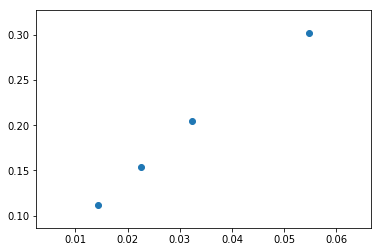

In [79]:
plt.scatter(xv,yv)

In [80]:
xv.reshape(4,-1),yv.reshape(4,-1)

(array([[0.01441689],
        [0.02252639],
        [0.032438  ],
        [0.05482022]]), array([[0.11120248],
        [0.1541991 ],
        [0.20502557],
        [0.30244686]]))

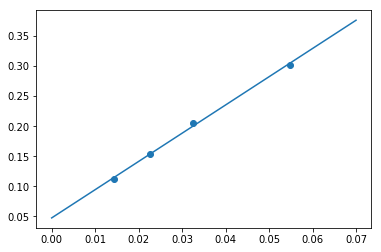

In [81]:
import sklearn.linear_model as lm
lr = lm.LinearRegression().fit(xv.reshape(4,-1),yv.reshape(4,-1))
testx = np.linspace(0,0.07, 10).reshape(10, -1)
plt.scatter(xv,yv)
plt.plot(testx, lr.predict(testx))

In [82]:
a = lr.coef_[0][0]
a

4.703389415290037

In [83]:
n = 1/a
n

0.21261263138219963

In [89]:
import statsmodels.api as sm
ols = sm.OLS(yv, xv)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
ols_result